# Notes:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.special import ndtri
ndtri(0.95) # Returns z by percentage, based on the standard normal distribution
# inverse function of CDF

In [122]:
%matplotlib inline

def ads(A0, D0, S0, A, D, S):
    A1 = A + D*A0
    D1 = D*D0
    S1 = S0 + (1-S0)*S
    return A1,D1,S1

x = np.random.uniform(0,1,10000000)
listADS = [[0.2, 1, 0], 
           [1.2, 1.2, 0], 
           [0, 1, 0.1], 
           [0.2, 1.2, 0.1]]

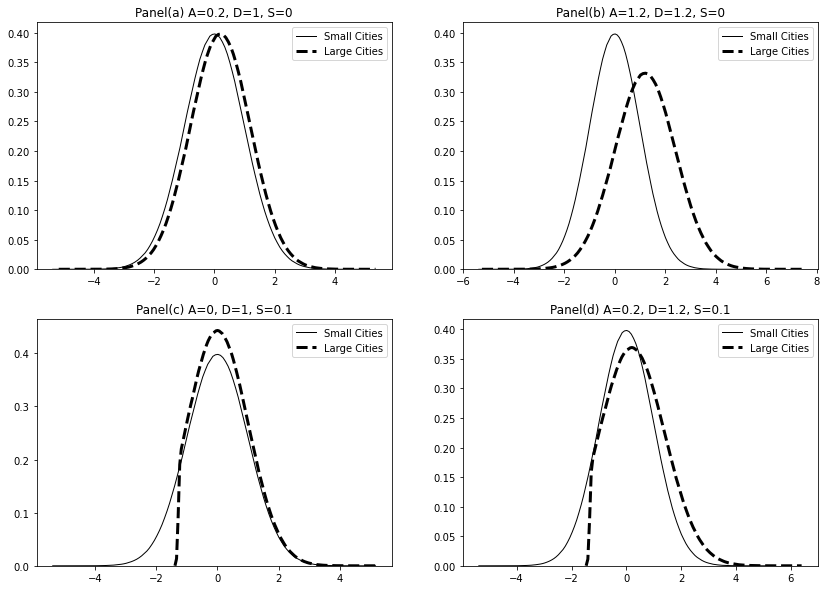

In [132]:
ADS0 = [0,1,0]
A0=ADS0[0]
D0=ADS0[1]
S0=ADS0[2]
fig1 = plt.figure(figsize=(14, 10))
panel = ["a", "b", "c", "d"]
for i in range(len(listADS)):
    ADS = listADS[i]
    A1,D1,S1 = ads(A0, D0, S0, ADS[0],ADS[1], ADS[2])
    tfp0 = A0+D0*ndtri(S0+x*(1-S0))
    tfp1 = A1+D1*ndtri(S1+x*(1-S1))
    
    plt.subplot(2,2,i+1)
    sns.distplot(tfp0, kde=True, hist = False, 
             kde_kws={"color": "k", "lw": 1, "label": "Small Cities"})
    sns.distplot(tfp1, kde=True, hist = False, 
                kde_kws={"color": "k", "lw": 3, 'ls':'--',"label": "Large Cities"})
    plt.legend(loc='upper right', ncol=1)
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    # refer to https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    plt.title("Panel({}) A={}, D={}, S={}".format(panel[i],ADS[0], ADS[1], ADS[2]))

In [133]:
fig1.savefig('.\MP\kd.png')